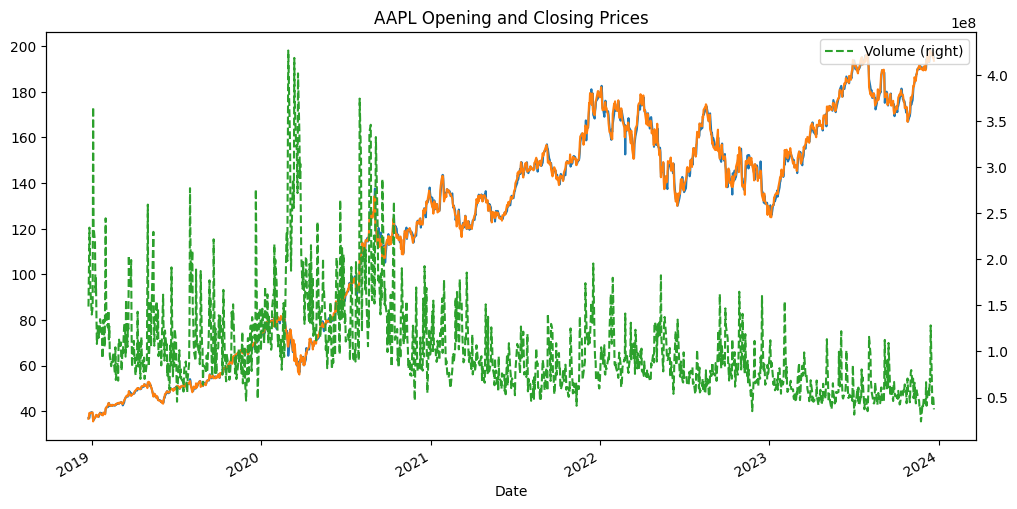

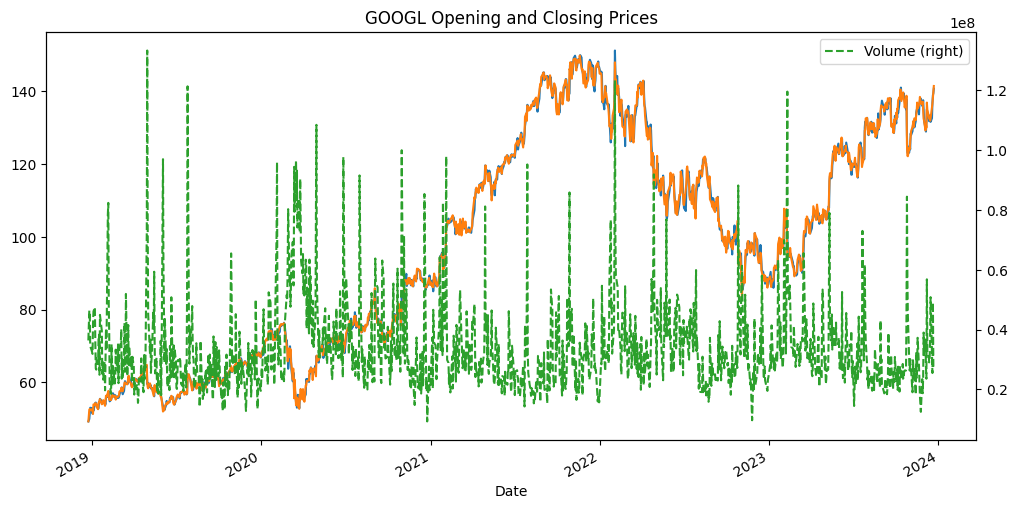

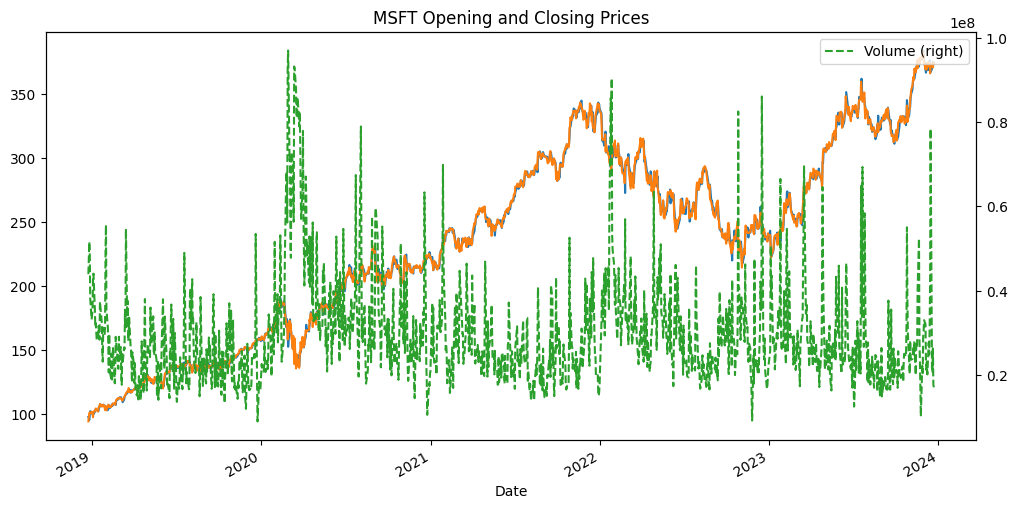

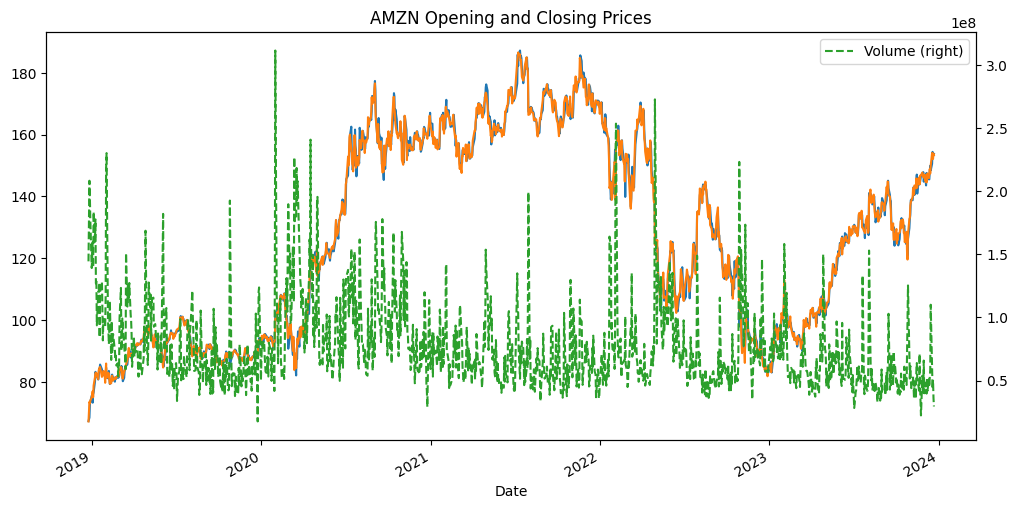

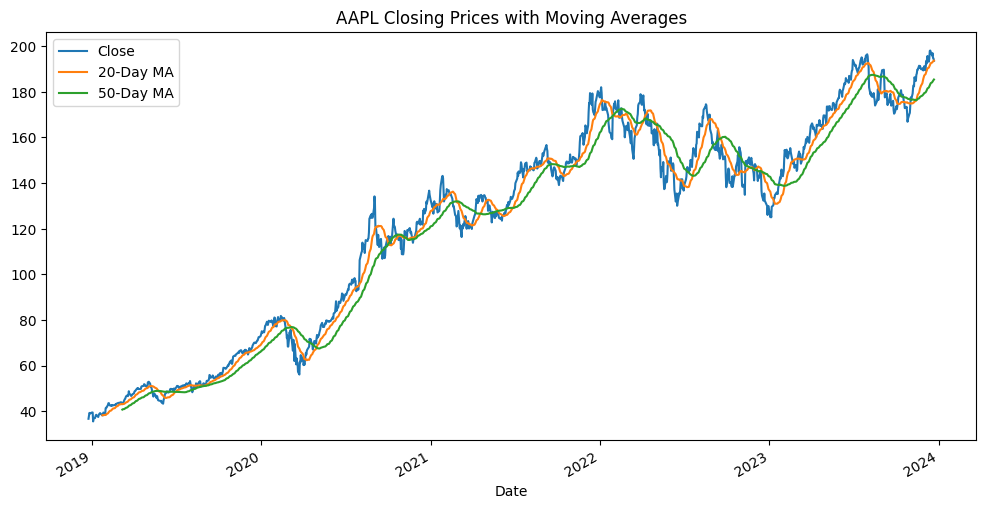

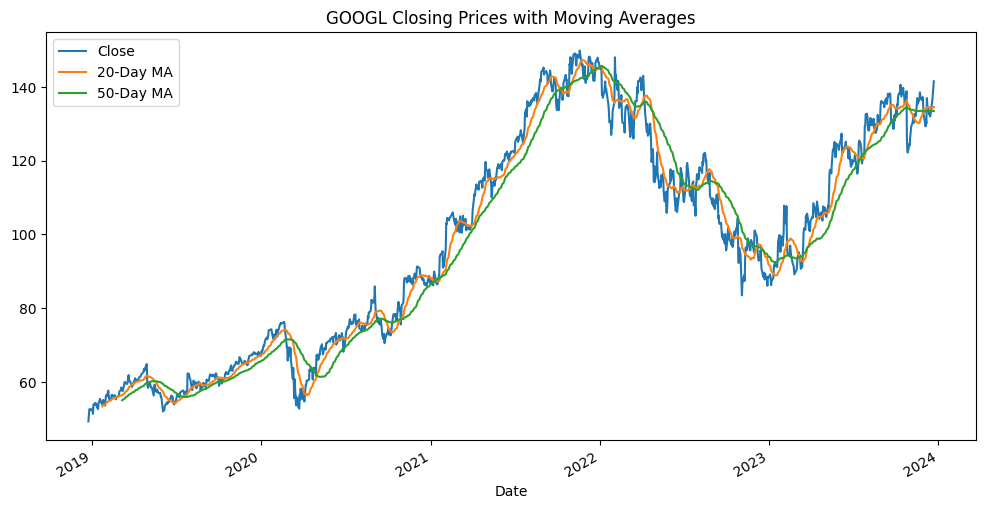

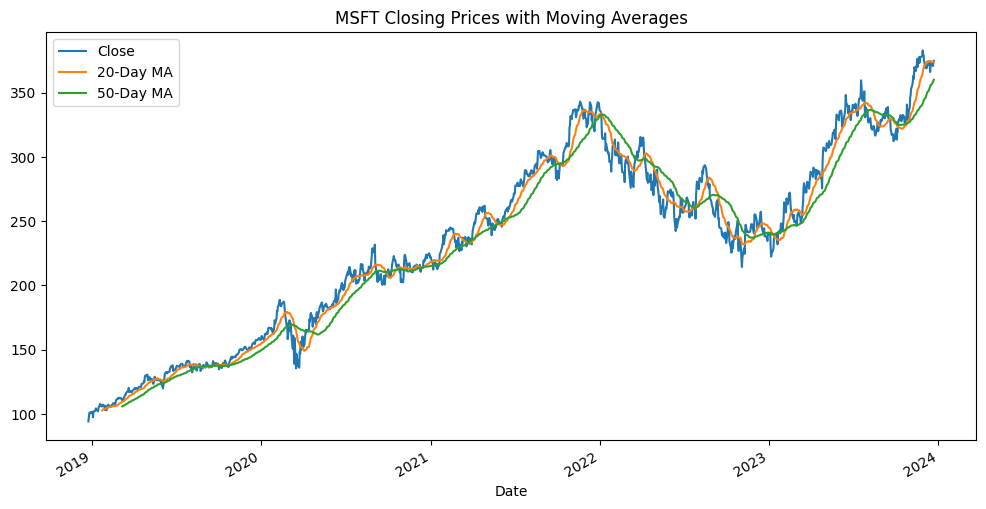

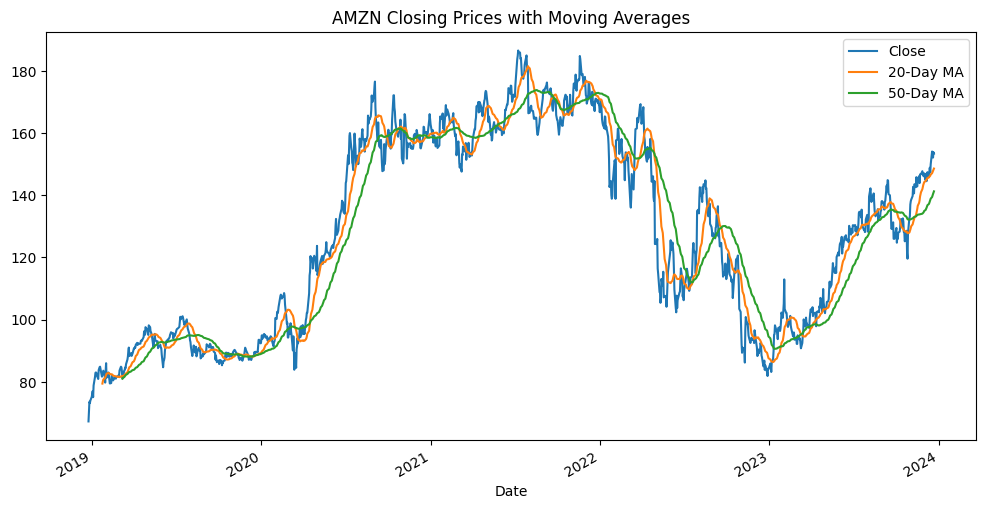

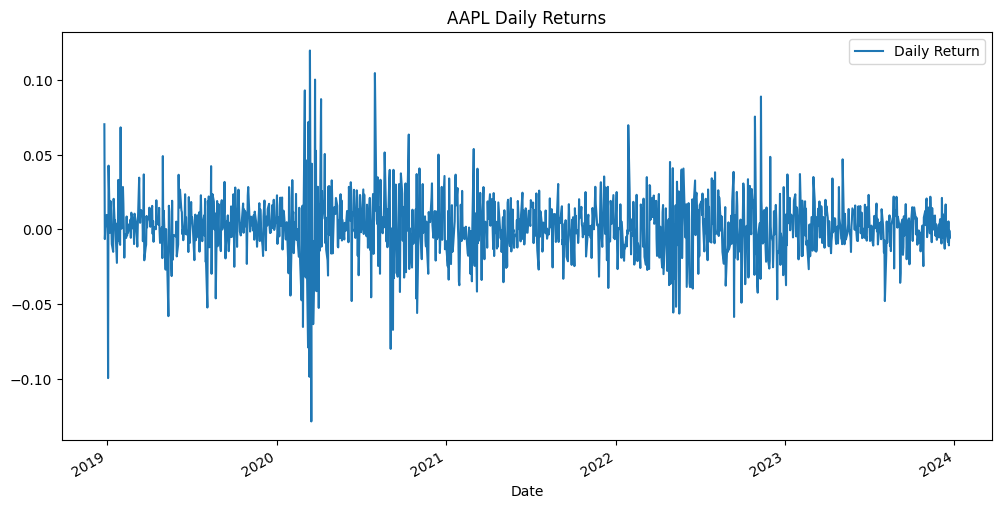

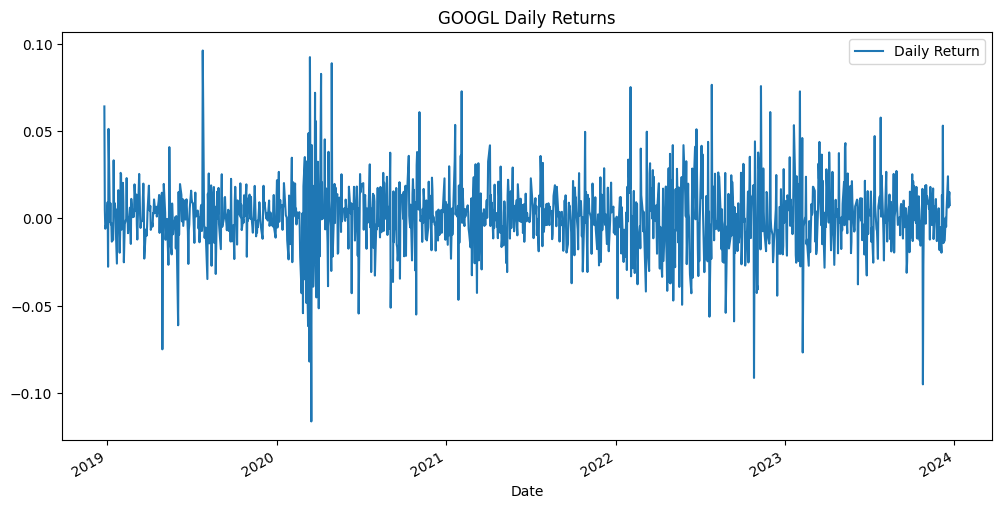

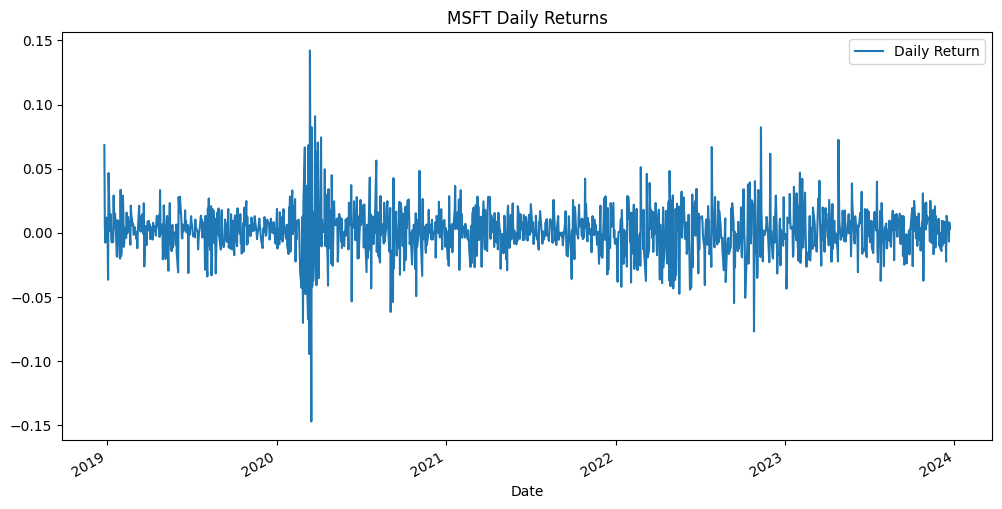

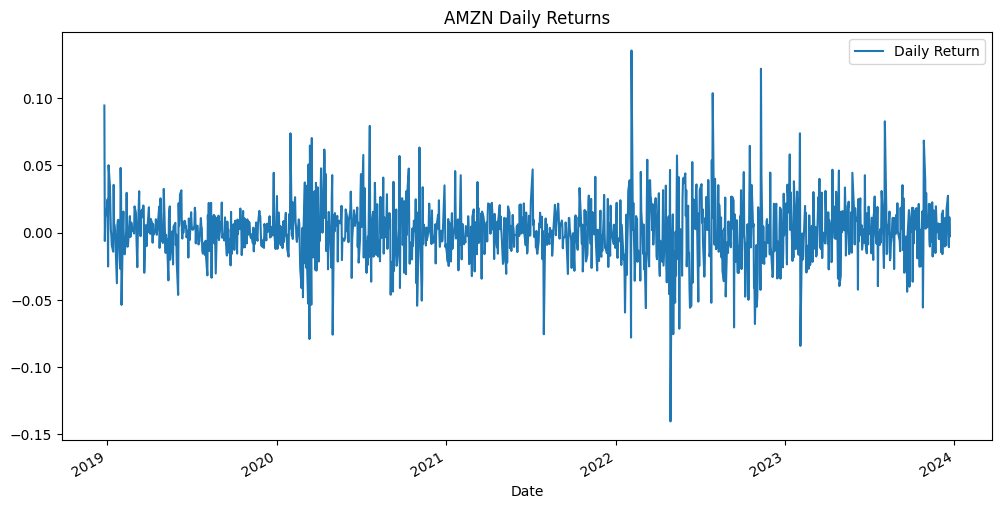

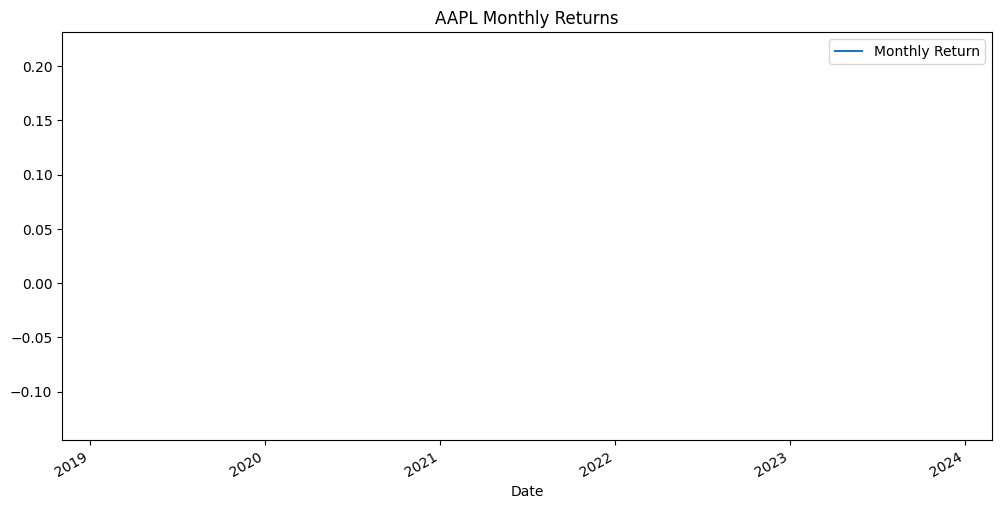

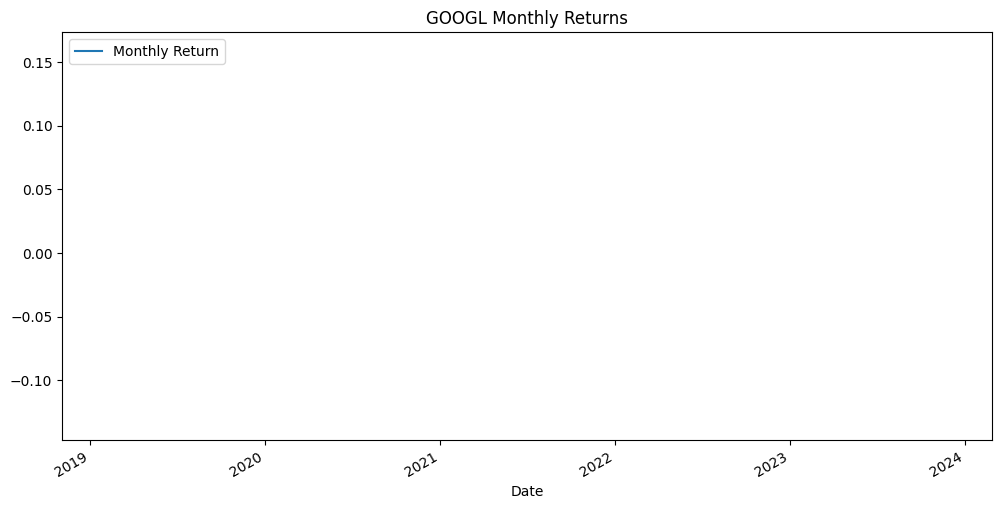

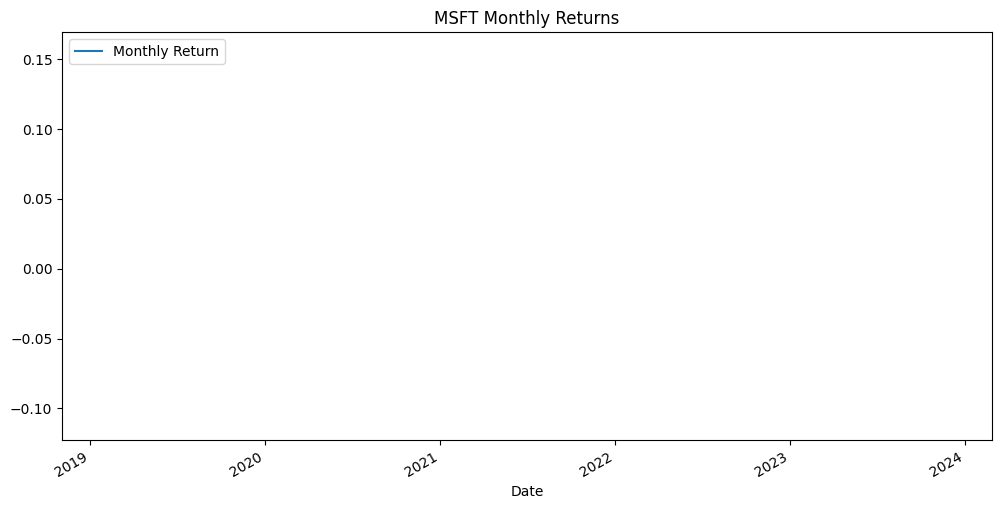

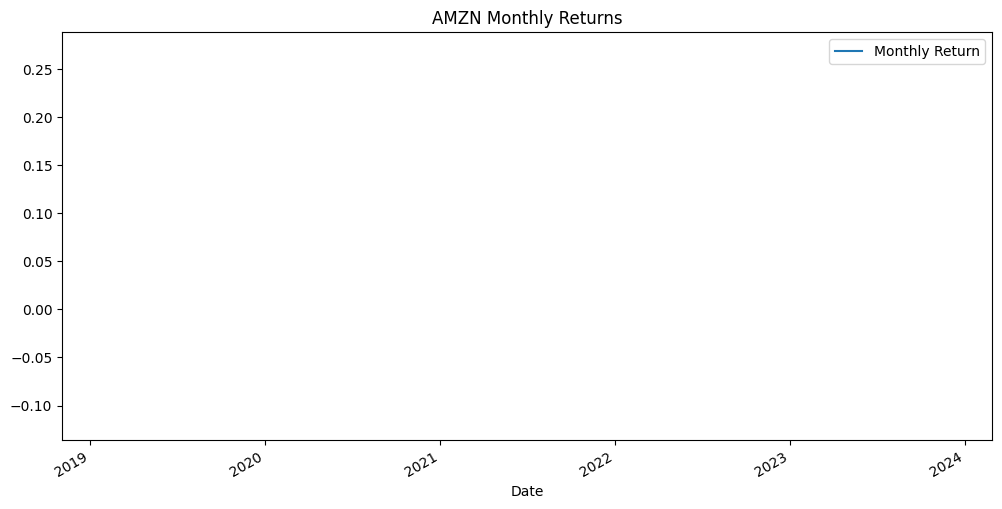

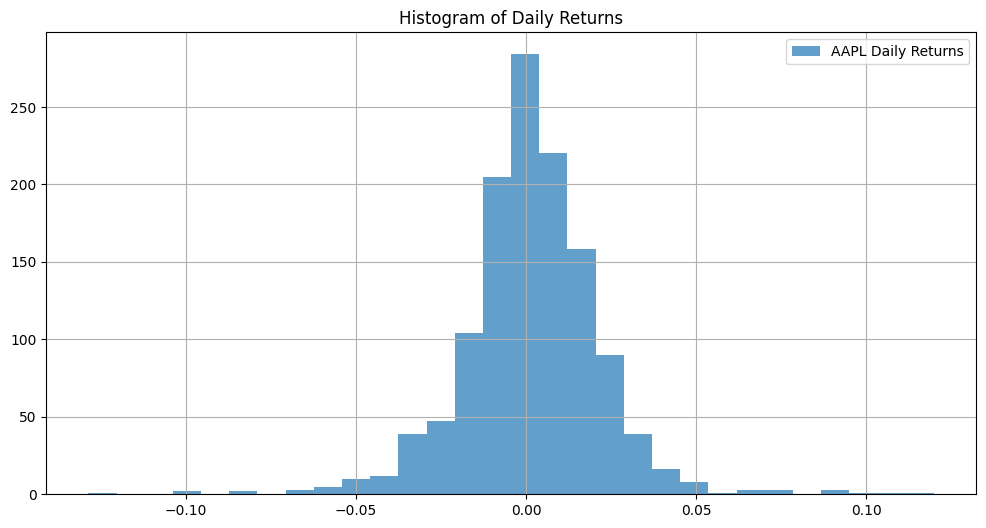

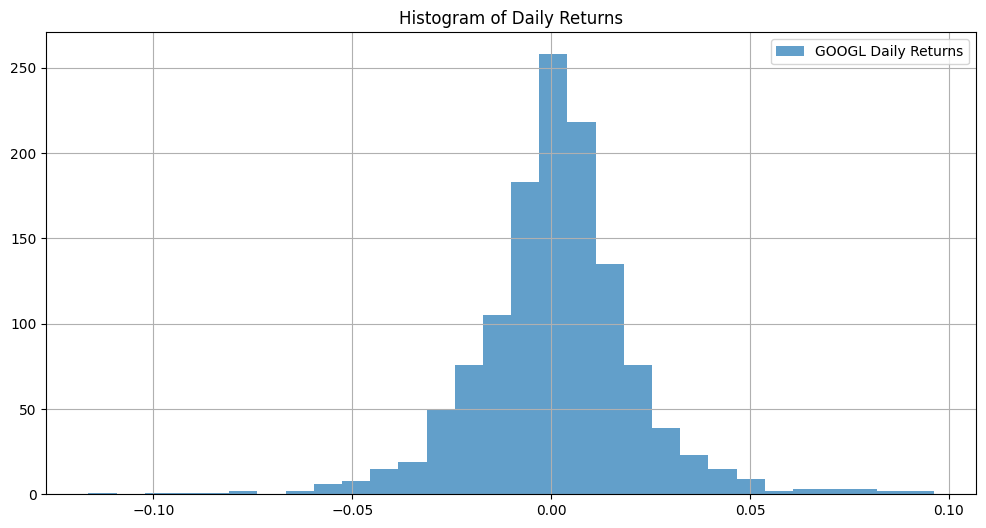

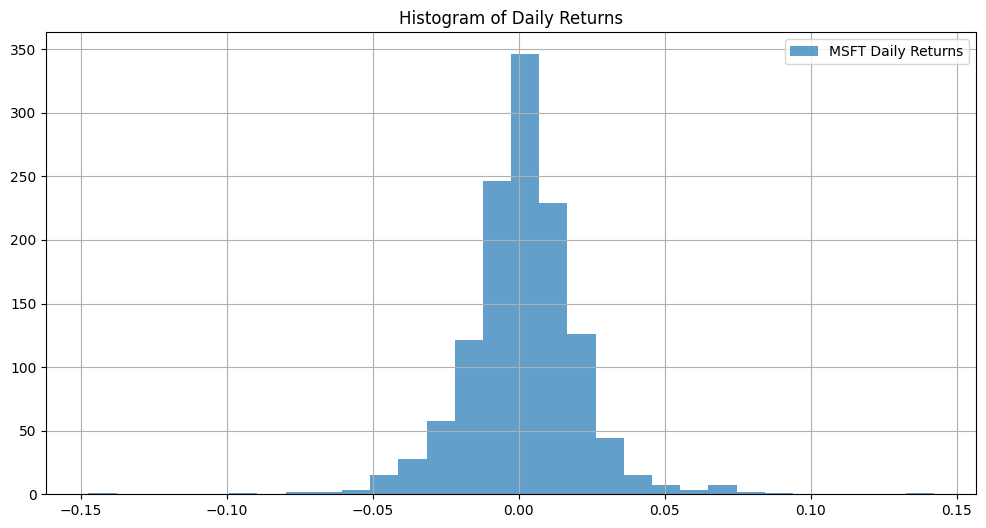

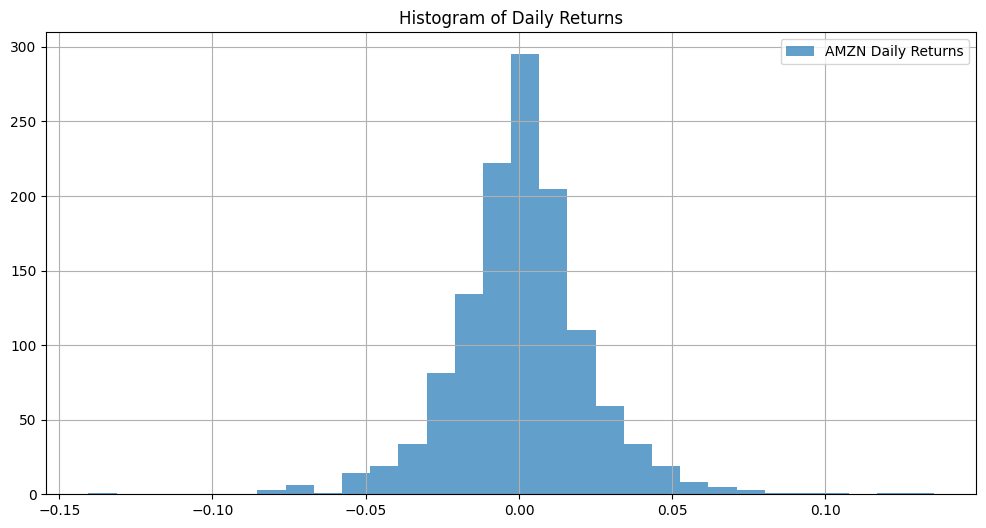

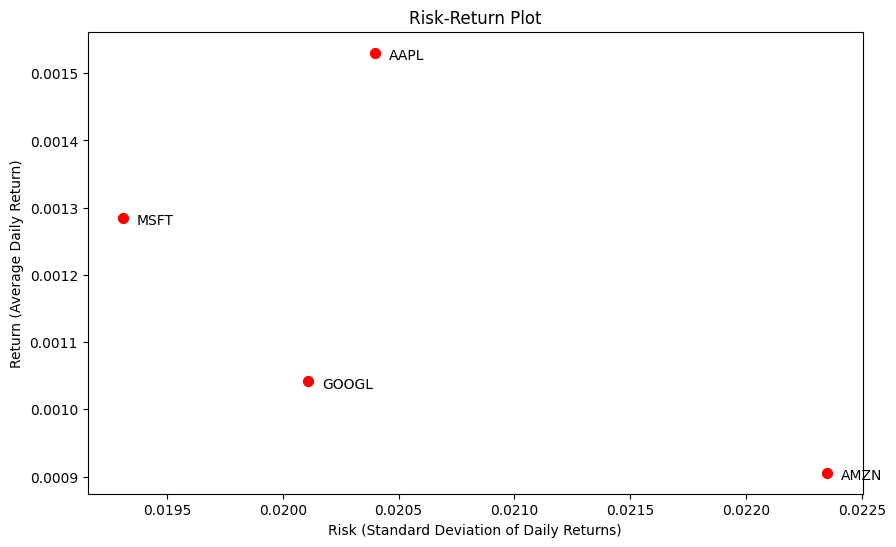

In [6]:
!pip install yfinance
!pip install matplotlib

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock symbols
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

#
stock_data = {}
for stock_symbol in stocks:
    stock_data[stock_symbol] = yf.download(stock_symbol, start='2018-12-23', end='2023-12-23', progress=False)

# opening and closing prices,volume of sales
for stock_symbol in stocks:
    plt.figure(figsize=(12, 6))
    stock_data[stock_symbol]['Open'].plot(label='Open', title=f'{stock_symbol} Opening and Closing Prices')
    stock_data[stock_symbol]['Close'].plot(label='Close')
    stock_data[stock_symbol]['Volume'].plot(secondary_y=True, label='Volume', linestyle='dashed')
    plt.legend()
    plt.show()

#moving averages
for stock_symbol in stocks:
    plt.figure(figsize=(12, 6))
    stock_data[stock_symbol]['Close'].plot(label='Close', title=f'{stock_symbol} Closing Prices with Moving Averages')
    stock_data[stock_symbol]['Close'].rolling(window=20).mean().plot(label='20-Day MA')
    stock_data[stock_symbol]['Close'].rolling(window=50).mean().plot(label='50-Day MA')
    plt.legend()
    plt.show()

#daily returns
for stock_symbol in stocks:
    stock_data[stock_symbol]['Daily Return'] = stock_data[stock_symbol]['Close'].pct_change()
    plt.figure(figsize=(12, 6))
    stock_data[stock_symbol]['Daily Return'].plot(label='Daily Return', title=f'{stock_symbol} Daily Returns')
    plt.legend()
    plt.show()

#monthly returns
for stock_symbol in stocks:
    stock_data[stock_symbol]['Monthly Return'] = stock_data[stock_symbol]['Close'].resample('M').ffill().pct_change()
    plt.figure(figsize=(12, 6))
    stock_data[stock_symbol]['Monthly Return'].plot(label='Monthly Return', title=f'{stock_symbol} Monthly Returns')
    plt.legend()
    plt.show()

# histogram for daily returns
for stock_symbol in stocks:
    plt.figure(figsize=(12, 6))
    stock_data[stock_symbol]['Daily Return'].hist(bins=30, label=f'{stock_symbol} Daily Returns', alpha=0.7)
    plt.title('Histogram of Daily Returns')
    plt.legend()
    plt.show()

# correlation between different stocks daily returns and volume of sales

correlation_returns = pd.DataFrame({stock_symbol: stock_data[stock_symbol]['Daily Return'] for stock_symbol in stocks})
correlation_volume = pd.DataFrame({stock_symbol: stock_data[stock_symbol]['Volume'] for stock_symbol in stocks})
correlation_returns.corr().style.background_gradient(cmap='coolwarm', axis=None).format("{:.2f}")


#risk-return plot
returns_std = correlation_returns.std()
returns_mean = correlation_returns.mean()
plt.figure(figsize=(10, 6))
plt.scatter(returns_std, returns_mean, s=50, c='red', marker='o')
plt.title('Risk-Return Plot')
plt.xlabel('Risk (Standard Deviation of Daily Returns)')
plt.ylabel('Return (Average Daily Return)')
for label, x, y in zip(stocks, returns_std, returns_mean):
    plt.annotate(label, xy=(x, y), xytext=(10, -5), textcoords='offset points')
plt.show()
